

Link:https://archive.ics.uci.edu/ml/datasets/Wine+Quality



In [1]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from time import time
import pandas as pd
import numpy as np

from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.svm import SVC

import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

### Reading Dataset: Red Wine Quality

In [2]:
# Load the Red Wines dataset
data = pd.read_csv("/Users/arjunkhanchandani/Desktop/winequality-red.csv")


# adding column name to the respective columns
data.columns =['fixed acidity','volatile acidity','citric acid','residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide','density','pH','sulphates','alcohol','quality']

# Display first few records
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
data.size

77964

### Removing outlier data
Using Interquartile range to calculate and remove outliers

In [4]:
# Removing outliers from quality column. Find data points with extreme high or low values
feature = "quality"

# Calculate the 25th and 75th percentile of the column
Q1, Q3 = np.percentile(data[feature], q=25), np.percentile(data[feature], q=75) 

# Select and Calculate outlier range using interquartile range
outlier_range = 1.5 * (Q3 - Q1)

# Outliers in data
num_data = data[((data["quality"] < (Q1 - outlier_range)) | (data["quality"] > (Q3 + outlier_range)))].shape[0]

# Remove outliers outside the outlier range
data = data[~((data["quality"] < (Q1 - outlier_range)) | (data["quality"] > (Q3 + outlier_range)))].reset_index(drop = True)

# Display number of outliers
print("Number of outliers removed: ", num_data)

Number of outliers removed:  228


### Exploratory Data Analysis

In [5]:
#Check number of entries in a cloumn
number_of_wines = data.shape[0]

# Number of wines with quality {6,7,8,9,10}
wine_quality_good = data.loc[(data['quality'] > 5)] #Accessing Column using label
number_of_good_wine = wine_quality_good.shape[0] #Returns Dimensionality of DataFrame in tuple format

# Number of wines with quality below 5
wine_quality_notgood = data.loc[(data['quality'] <= 5)]
number_of_notgood_wine = wine_quality_notgood.shape[0]

# Percentage of wines with good quality
good_wine_percentage = number_of_good_wine*100/number_of_wines

# Print the results
print("Total number of wine: {}".format(number_of_wines))
print("Wines with rating 6 and above: {}".format(number_of_good_wine))
print("Wines with rating less than 5: {}".format(number_of_notgood_wine))
print("Percentage of wines with quality 6 and above: {:.2f}%".format(good_wine_percentage))

Total number of wine: 6269
Wines with rating 6 and above: 3915
Wines with rating less than 5: 2354
Percentage of wines with quality 6 and above: 62.45%


### Plotting Pie Chart to show distribution of positive and negative classes

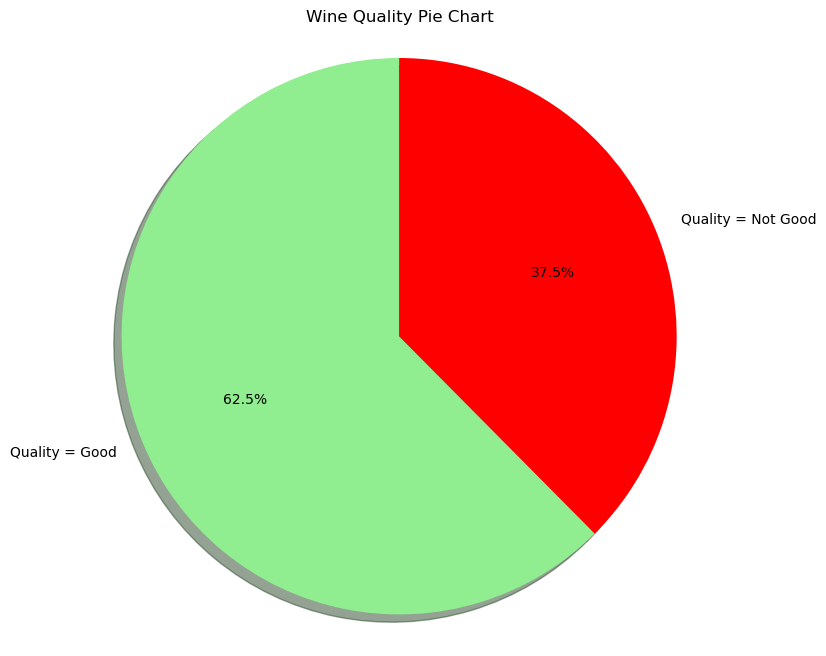

In [6]:
# Data to plot
plt.figure(figsize = (8,8))
labels = 'Quality = Good', 'Quality = Not Good'
plt.title('Wine Quality Pie Chart')
sizes = [number_of_good_wine, number_of_notgood_wine]
colors = ['lightgreen', 'red']

# Plot pie chart
plt.pie(sizes,  labels=labels, colors=colors,autopct='%1.1f%%', shadow=True, startangle=90)
plt.axis('equal')
plt.show()

In [7]:
# Create Classification version of target variable
data['goodquality'] = [1 if x > 5 else 0 for x in data['quality']]

# Separate feature variables and target variable
X = data.drop(['quality','goodquality'], axis = 1)
y = data['goodquality']

### Individual Distributions

<AxesSubplot:xlabel='fixed acidity', ylabel='Density'>

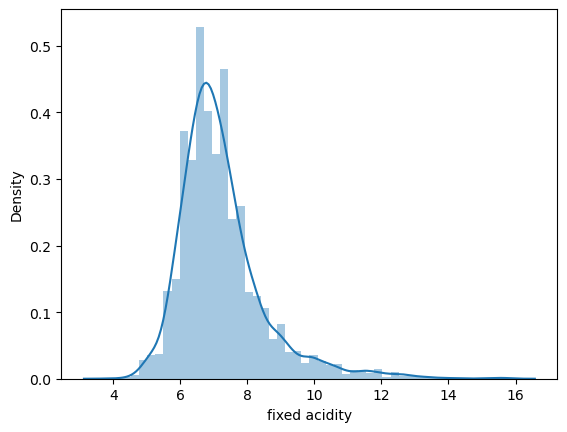

In [8]:
sns.distplot(data['fixed acidity'])

<AxesSubplot:xlabel='volatile acidity', ylabel='Density'>

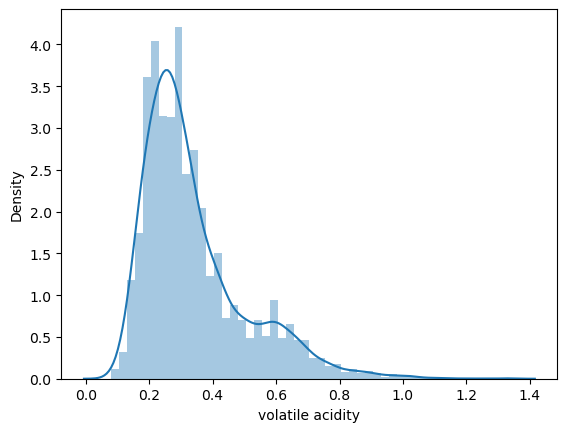

In [9]:
sns.distplot(data['volatile acidity'])

<AxesSubplot:xlabel='volatile acidity', ylabel='Density'>

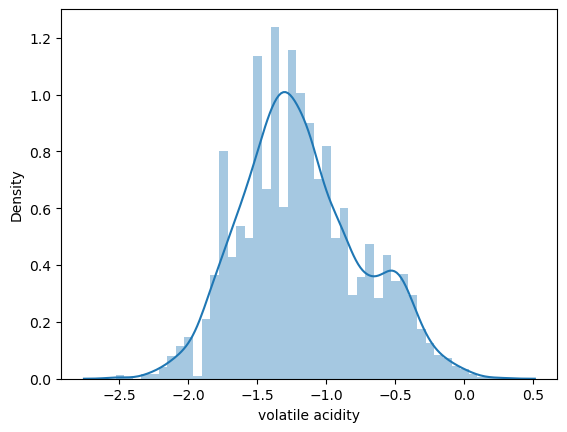

In [10]:
sns.distplot(np.log(data['volatile acidity']))

<AxesSubplot:xlabel='citric acid', ylabel='Density'>

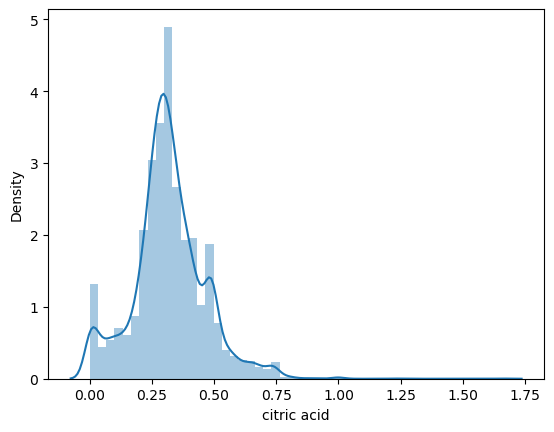

In [11]:
sns.distplot(data['citric acid'])

<AxesSubplot:xlabel='residual sugar', ylabel='Density'>

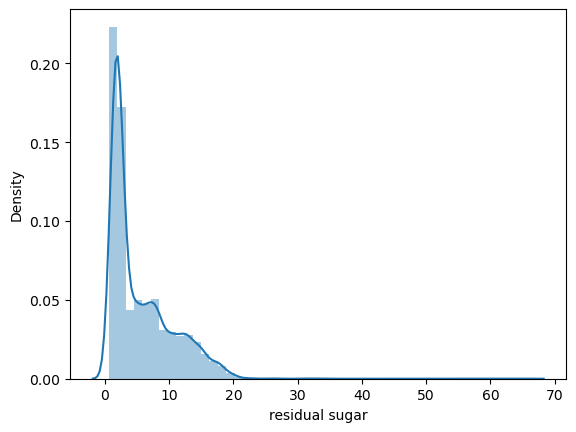

In [12]:
sns.distplot(data['residual sugar'])

<AxesSubplot:xlabel='chlorides', ylabel='Density'>

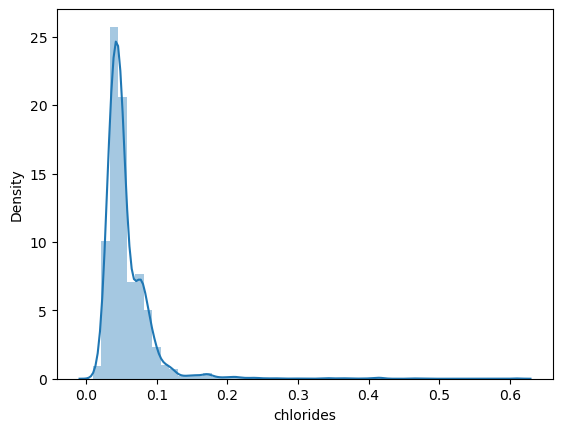

In [13]:
sns.distplot(data['chlorides'])

<AxesSubplot:xlabel='chlorides', ylabel='Density'>

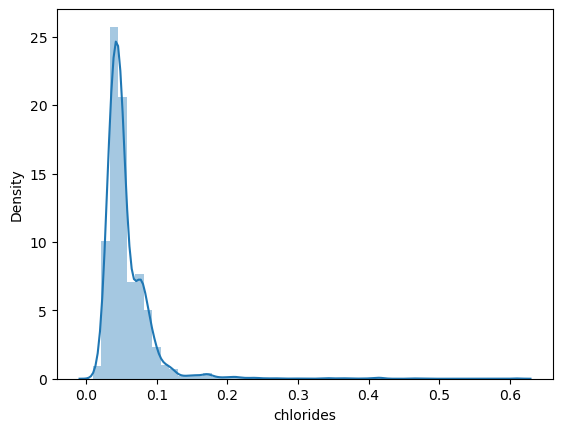

In [14]:
sns.distplot(data['chlorides'])

<AxesSubplot:xlabel='free sulfur dioxide', ylabel='Density'>

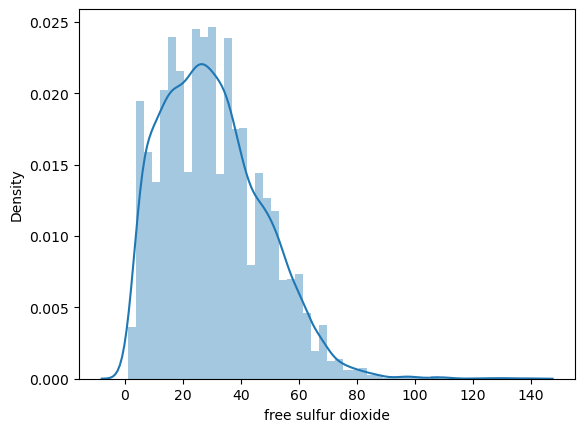

In [15]:
sns.distplot(data['free sulfur dioxide'])
#Most of the free sulfur dioxide seems to be between the 1-40.

<AxesSubplot:xlabel='total sulfur dioxide', ylabel='Density'>

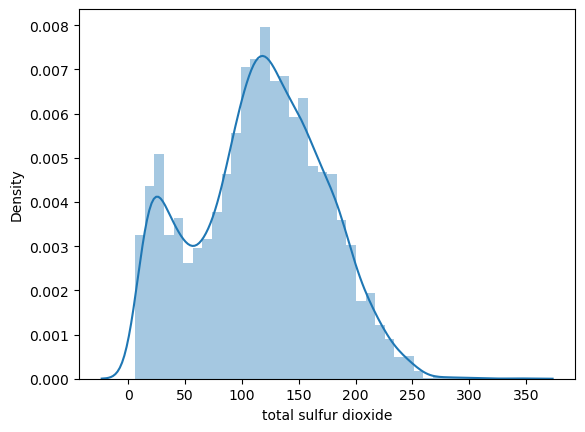

In [16]:
sns.distplot(data['total sulfur dioxide'])
#Most of the total sulfur dioxide seems to a have a spread between 0 and 150

<AxesSubplot:xlabel='total sulfur dioxide', ylabel='Density'>

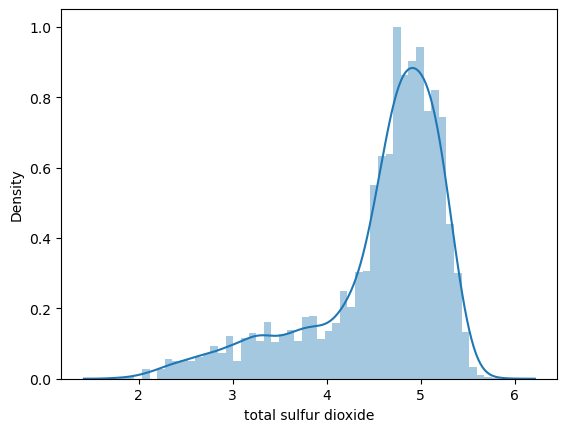

In [17]:
sns.distplot(np.log(data['total sulfur dioxide']))

<AxesSubplot:xlabel='density', ylabel='Density'>

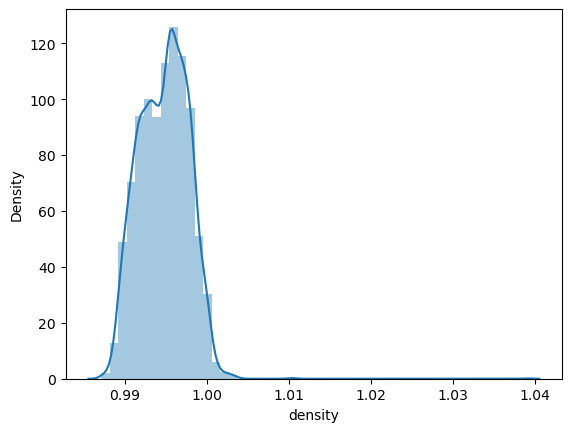

In [18]:
sns.distplot(data['density'])

<AxesSubplot:xlabel='pH', ylabel='Density'>

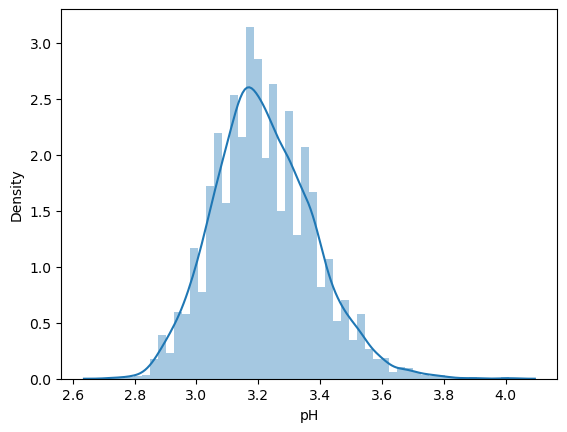

In [19]:
sns.distplot(data['pH'])
#pH distrbution seems to be normally distributed with major samples exhibiting values between 3.0 and 3.5.

<AxesSubplot:xlabel='alcohol', ylabel='Density'>

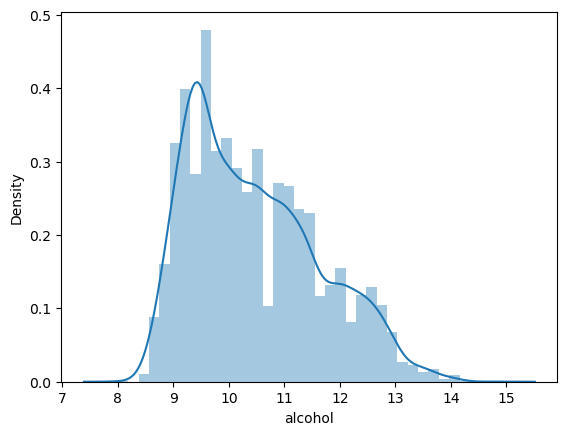

In [20]:
sns.distplot(data['alcohol'])
#The alcohol content seems to vary from 8 to 14 with most of data around 9-10

<AxesSubplot:xlabel='sulphates', ylabel='Density'>

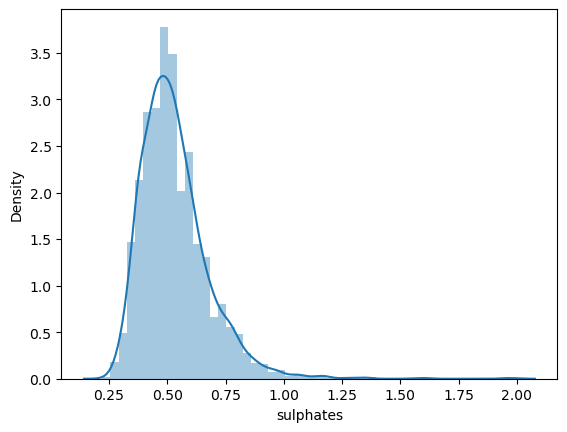

In [21]:
sns.distplot(data['sulphates'])

### Describing the entire Dataset

In [22]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,goodquality
count,6269.000000,6269.000000,6269.000000,6269.000000,6269.000000,6269.000000,6269.000000,6269.000000,6269.000000,6269.000000,6269.000000,6269.000000,6269.000000
mean,7.223792,0.340349,0.318331,5.447599,0.056415,30.358032,115.659675,0.994761,3.218097,0.532018,10.455237,5.762163,0.624502
std,1.296267,0.163971,0.146301,4.776142,0.035169,17.314364,56.549249,0.002976,0.160638,0.148350,1.170695,0.771044,0.484290
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,4.000000,0.000000
25%,6.400000,0.230000,0.240000,1.800000,0.038000,17.000000,77.000000,0.992400,3.110000,0.430000,9.500000,5.000000,0.000000
50%,7.000000,0.290000,0.310000,3.000000,0.048000,29.000000,118.000000,0.994980,3.210000,0.510000,10.200000,6.000000,1.000000
75%,7.700000,0.410000,0.390000,8.100000,0.066000,41.000000,156.000000,0.997000,3.320000,0.600000,11.266667,6.000000,1.000000
max,15.900000,1.330000,1.660000,65.800000,0.611000,138.500000,344.000000,1.038980,4.010000,2.000000,14.900000,7.000000,1.000000


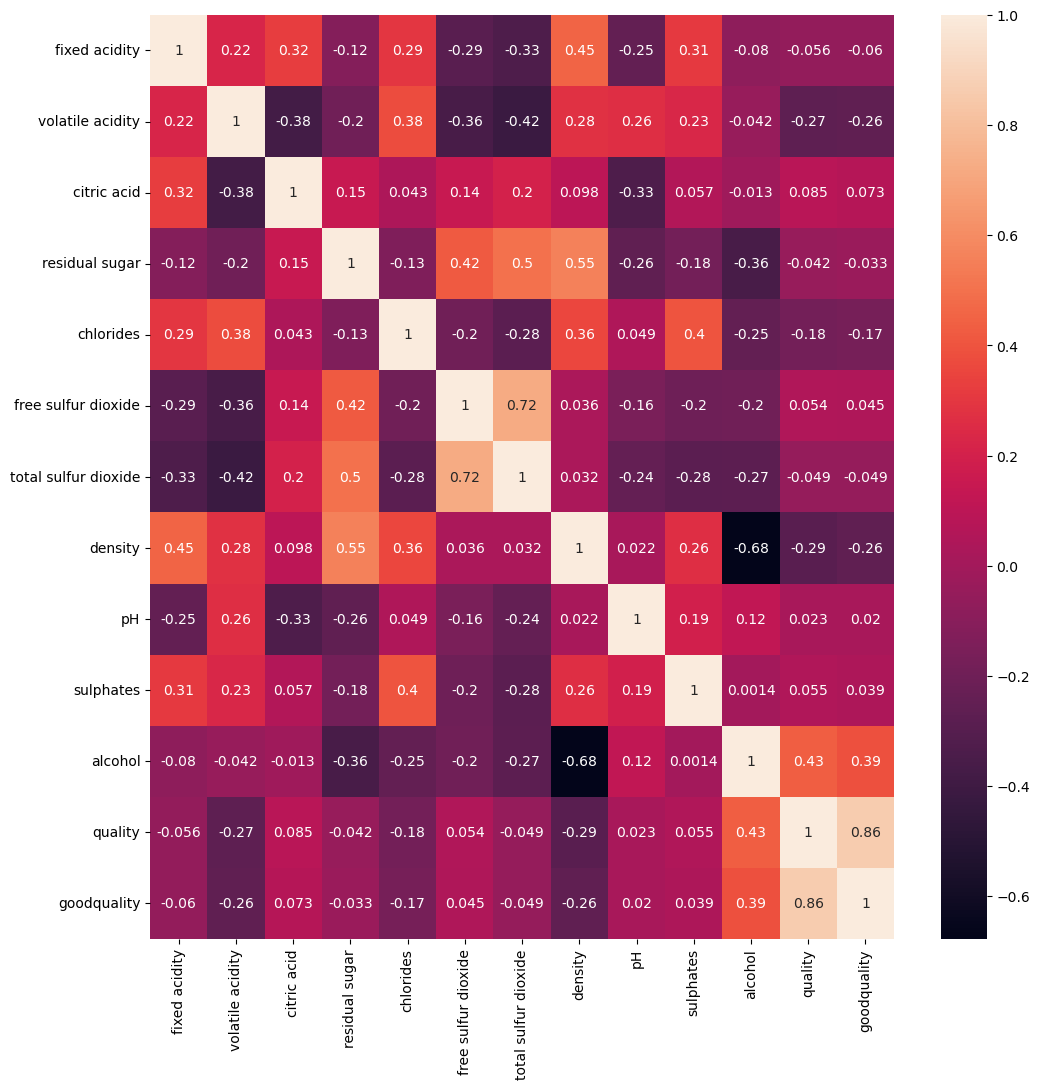

In [23]:
# Sample correlations using Seaborn heatmap
correlation = data.corr()
plt.figure(figsize=(12, 12))

heatmap = sns.heatmap(correlation, annot=True)

In [24]:
data.corr()["quality"]

fixed acidity          -0.055976
volatile acidity       -0.267220
citric acid             0.085272
residual sugar         -0.042271
chlorides              -0.183774
free sulfur dioxide     0.054098
total sulfur dioxide   -0.049464
density                -0.286495
pH                      0.022609
sulphates               0.055217
alcohol                 0.431838
quality                 1.000000
goodquality             0.858837
Name: quality, dtype: float64

In [25]:
data.drop(columns=['volatile acidity'],inplace=True)
data.drop(columns=['chlorides'],inplace=True)
data.drop(columns=['density'],inplace=True)

In [26]:
data.skew(axis = 0, skipna = True)

fixed acidity           1.740850
citric acid             0.481907
residual sugar          1.444751
free sulfur dioxide     0.715483
total sulfur dioxide   -0.039782
pH                      0.397411
sulphates               1.843467
alcohol                 0.602563
quality                -0.015264
goodquality            -0.514325
dtype: float64

In [27]:
data['fixed acidity log'] = np.log(data['fixed acidity'])
data['fixed acidity sqrt'] = np.sqrt(data['fixed acidity'])
data['fixed acidity cbrt'] = np.cbrt(data['fixed acidity'])

In [28]:
data['residual sugar log'] = np.log(data['residual sugar'])
data['residual sugar sqrt'] = np.sqrt(data['residual sugar'])
data['residual sugar cbrt'] = np.cbrt(data['residual sugar'])

In [29]:
data['sulphates log'] = np.log(data['sulphates'])
data['sulphates sqrt'] = np.sqrt(data['sulphates'])
data['sulphates cbrt'] = np.cbrt(data['sulphates'])

In [30]:
data['free sulfur dioxide log'] = np.log(data['free sulfur dioxide'])
data['free sulfur dioxide sqrt'] = np.sqrt(data['free sulfur dioxide'])
data['free sulfur dioxide cbrt'] = np.cbrt(data['free sulfur dioxide'])

In [31]:
data['alcohol log'] = np.log(data['alcohol'])
data['alcohol sqrt'] = np.sqrt(data['alcohol'])
data['alcohol cbrt'] = np.cbrt(data['alcohol'])

In [32]:
data['citric acid log'] = np.log(data['citric acid'])
data['citric acid sqrt'] = np.sqrt(data['citric acid'])
data['citric acid cbrt'] = np.cbrt(data['citric acid'])

In [33]:
data.skew(axis = 0, skipna = True)

fixed acidity               1.740850
citric acid                 0.481907
residual sugar              1.444751
free sulfur dioxide         0.715483
total sulfur dioxide       -0.039782
pH                          0.397411
sulphates                   1.843467
alcohol                     0.602563
quality                    -0.015264
goodquality                -0.514325
fixed acidity log           0.916731
fixed acidity sqrt          1.308258
fixed acidity cbrt          1.173834
residual sugar log          0.245143
residual sugar sqrt         0.719799
residual sugar cbrt         0.553150
sulphates log               0.424127
sulphates sqrt              0.998026
sulphates cbrt              0.786059
free sulfur dioxide log    -0.837340
free sulfur dioxide sqrt   -0.037791
free sulfur dioxide cbrt   -0.290362
alcohol log                 0.416226
alcohol sqrt                0.508164
alcohol cbrt                0.477255
citric acid log                  NaN
citric acid sqrt           -1.200775
c

In [34]:
data.drop(columns=['fixed acidity'],inplace=True)
data.drop(columns=['fixed acidity sqrt'],inplace=True)
data.drop(columns=['fixed acidity cbrt'],inplace=True)
data.drop(columns=['citric acid log'],inplace=True)
data.drop(columns=['citric acid sqrt'],inplace=True)
data.drop(columns=['citric acid cbrt'],inplace=True)
data.drop(columns=['free sulfur dioxide'],inplace=True)
data.drop(columns=['free sulfur dioxide log'],inplace=True)
data.drop(columns=['free sulfur dioxide cbrt'],inplace=True)
data.drop(columns=['sulphates'],inplace=True)
data.drop(columns=['sulphates sqrt'],inplace=True)
data.drop(columns=['sulphates cbrt'],inplace=True)
data.drop(columns=['alcohol'],inplace=True)
data.drop(columns=['alcohol sqrt'],inplace=True)
data.drop(columns=['alcohol cbrt'],inplace=True)
data.drop(columns=['residual sugar'],inplace=True)
data.drop(columns=['residual sugar sqrt'],inplace=True)
data.drop(columns=['residual sugar cbrt'],inplace=True)

In [35]:
data.skew(axis = 0, skipna = True)

citric acid                 0.481907
total sulfur dioxide       -0.039782
pH                          0.397411
quality                    -0.015264
goodquality                -0.514325
fixed acidity log           0.916731
residual sugar log          0.245143
sulphates log               0.424127
free sulfur dioxide sqrt   -0.037791
alcohol log                 0.416226
dtype: float64

In [36]:
data['pH log'] = np.log(data['pH'])
data['pH sqrt'] = np.sqrt(data['pH'])
data['pH cbrt'] = np.cbrt(data['pH'])

In [37]:
data.skew(axis = 0, skipna = True)

citric acid                 0.481907
total sulfur dioxide       -0.039782
pH                          0.397411
quality                    -0.015264
goodquality                -0.514325
fixed acidity log           0.916731
residual sugar log          0.245143
sulphates log               0.424127
free sulfur dioxide sqrt   -0.037791
alcohol log                 0.416226
pH log                      0.236343
pH sqrt                     0.316083
pH cbrt                     0.289339
dtype: float64

In [38]:
data.drop(columns=['pH'],inplace=True)
data.drop(columns=['pH sqrt'],inplace=True)
data.drop(columns=['pH cbrt'],inplace=True)

In [39]:
data.skew(axis = 0, skipna = True)

citric acid                 0.481907
total sulfur dioxide       -0.039782
quality                    -0.015264
goodquality                -0.514325
fixed acidity log           0.916731
residual sugar log          0.245143
sulphates log               0.424127
free sulfur dioxide sqrt   -0.037791
alcohol log                 0.416226
pH log                      0.236343
dtype: float64

### Split data into Training set and Testing set

In [40]:
X = data.drop('quality', axis=1)
X = data.drop('goodquality', axis=1)
y = data['goodquality']

In [41]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [42]:
subset1_X = X_train.sample(frac=0.1, random_state=2)
subset2_X = X_train.sample(frac=0.1, random_state=4)
subset3_X = X_train.sample(frac=0.1, random_state=6)
subset4_X = X_train.sample(frac=0.1, random_state=8)
subset5_X = X_train.sample(frac=0.1, random_state=10)
subset6_X = X_train.sample(frac=0.1, random_state=12)
subset7_X = X_train.sample(frac=0.1, random_state=14)
subset8_X = X_train.sample(frac=0.1, random_state=16)
subset9_X = X_train.sample(frac=0.1, random_state=18)
subset10_X = X_train.sample(frac=0.1, random_state=20)

subset1_y = y_train.sample(frac=0.1, random_state=2)
subset2_y = y_train.sample(frac=0.1, random_state=4)
subset3_y = y_train.sample(frac=0.1, random_state=6)
subset4_y = y_train.sample(frac=0.1, random_state=8)
subset5_y = y_train.sample(frac=0.1, random_state=10)
subset6_y = y_train.sample(frac=0.1, random_state=12)
subset7_y = y_train.sample(frac=0.1, random_state=14)
subset8_y = y_train.sample(frac=0.1, random_state=16)
subset9_y = y_train.sample(frac=0.1, random_state=18)
subset10_y = y_train.sample(frac=0.1, random_state=20)



In [43]:
subset1_X

,citric acid,total sulfur dioxide,quality,fixed acidity log,residual sugar log,sulphates log,free sulfur dioxide sqrt,alcohol log,pH log
5306,0.24,138.0,7,1.824549,1.568616,-0.843970,6.708204,2.415914,1.172482
3236,0.44,197.0,6,1.808289,2.509599,-0.616186,7.280110,2.251292,1.175573
5599,0.53,69.0,4,1.871802,0.336472,-0.653926,2.236068,2.312535,1.144223
5197,0.30,49.0,5,2.091864,0.262364,-0.314711,2.645751,2.332144,1.095273
1154,0.46,16.0,6,2.272126,0.741937,-0.301105,2.236068,2.509599,1.184790
...,...,...,...,...,...,...,...,...,...
3271,0.24,189.0,7,2.054124,0.470004,-0.301105,5.099020,2.493205,1.124930
851,0.07,86.0,5,1.974081,0.955511,-0.616186,4.000000,2.272126,1.255616
3689,0.37,96.0,5,2.054124,0.262364,-0.478036,4.000000,2.302585,1.199965
782,0.54,26.0,6,2.312535,0.832909,-0.634878,2.645751,2.525729,1.153732


In [44]:
subset1_y

5306    1
3236    1
5599    0
5197    0
1154    1
       ..
3271    1
851     0
3689    0
782     1
2624    1
Name: goodquality, Length: 439, dtype: int64

# Implementing SVM

In [45]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
  
# defining parameter range
param_grid = {
              'kernel': ['linear', 'poly', 'rbf', 'sigmoid']
              } 
  
grid_1 = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)
  
# fitting the model for grid search
grid_1.fit(subset1_X, subset1_y)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV 1/5] END .....................kernel=linear;, score=1.000 total time=   0.4s
[CV 2/5] END .....................kernel=linear;, score=1.000 total time=   0.8s
[CV 3/5] END .....................kernel=linear;, score=1.000 total time=   0.5s
[CV 4/5] END .....................kernel=linear;, score=1.000 total time=   0.0s
[CV 5/5] END .....................kernel=linear;, score=1.000 total time=   0.4s
[CV 1/5] END .......................kernel=poly;, score=0.591 total time=   0.0s
[CV 2/5] END .......................kernel=poly;, score=0.591 total time=   0.0s
[CV 3/5] END .......................kernel=poly;, score=0.602 total time=   0.0s
[CV 4/5] END .......................kernel=poly;, score=0.591 total time=   0.0s
[CV 5/5] END .......................kernel=poly;, score=0.598 total time=   0.0s
[CV 1/5] END ........................kernel=rbf;, score=0.580 total time=   0.0s
[CV 2/5] END ........................kernel=rbf;,

GridSearchCV(estimator=SVC(),
             param_grid={'kernel': ['linear', 'poly', 'rbf', 'sigmoid']},
             verbose=3)

In [46]:
print(grid_1.best_params_)

{'kernel': 'linear'}


In [47]:
from sklearn.metrics import classification_report

grid_predictions = grid_1.predict(X_test)
print(classification_report(y_test, grid_predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       733
           1       1.00      1.00      1.00      1148

    accuracy                           1.00      1881
   macro avg       1.00      1.00      1.00      1881
weighted avg       1.00      1.00      1.00      1881



In [48]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
  
# defining parameter range
param_grid = {'kernel': ['linear', 'poly', 'rbf', 'sigmoid']} 
  
grid_2 = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)
  
# fitting the model for grid search
grid_2.fit(subset2_X, subset2_y)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV 1/5] END .....................kernel=linear;, score=1.000 total time=   0.4s
[CV 2/5] END .....................kernel=linear;, score=1.000 total time=   0.0s
[CV 3/5] END .....................kernel=linear;, score=1.000 total time=   0.3s
[CV 4/5] END .....................kernel=linear;, score=1.000 total time=   0.3s
[CV 5/5] END .....................kernel=linear;, score=1.000 total time=   0.2s
[CV 1/5] END .......................kernel=poly;, score=0.625 total time=   0.0s
[CV 2/5] END .......................kernel=poly;, score=0.625 total time=   0.0s
[CV 3/5] END .......................kernel=poly;, score=0.614 total time=   0.0s
[CV 4/5] END .......................kernel=poly;, score=0.614 total time=   0.0s
[CV 5/5] END .......................kernel=poly;, score=0.621 total time=   0.0s
[CV 1/5] END ........................kernel=rbf;, score=0.625 total time=   0.0s
[CV 2/5] END ........................kernel=rbf;,

GridSearchCV(estimator=SVC(),
             param_grid={'kernel': ['linear', 'poly', 'rbf', 'sigmoid']},
             verbose=3)

In [49]:
print(grid_2.best_params_)

{'kernel': 'linear'}


In [50]:
from sklearn.metrics import classification_report

grid_predictions = grid_2.predict(X_test)
print(classification_report(y_test, grid_predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       733
           1       1.00      1.00      1.00      1148

    accuracy                           1.00      1881
   macro avg       1.00      1.00      1.00      1881
weighted avg       1.00      1.00      1.00      1881



In [51]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
  
# defining parameter range
param_grid = {'kernel': ['linear', 'poly', 'rbf', 'sigmoid']} 
  
grid_3 = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)
  
# fitting the model for grid search
grid_3.fit(subset3_X, subset3_y)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV 1/5] END .....................kernel=linear;, score=1.000 total time=   0.9s
[CV 2/5] END .....................kernel=linear;, score=1.000 total time=   0.5s
[CV 3/5] END .....................kernel=linear;, score=1.000 total time=   0.4s
[CV 4/5] END .....................kernel=linear;, score=1.000 total time=   0.2s
[CV 5/5] END .....................kernel=linear;, score=1.000 total time=   0.3s
[CV 1/5] END .......................kernel=poly;, score=0.659 total time=   0.0s
[CV 2/5] END .......................kernel=poly;, score=0.670 total time=   0.0s
[CV 3/5] END .......................kernel=poly;, score=0.670 total time=   0.0s
[CV 4/5] END .......................kernel=poly;, score=0.670 total time=   0.0s
[CV 5/5] END .......................kernel=poly;, score=0.667 total time=   0.0s
[CV 1/5] END ........................kernel=rbf;, score=0.659 total time=   0.0s
[CV 2/5] END ........................kernel=rbf;,

GridSearchCV(estimator=SVC(),
             param_grid={'kernel': ['linear', 'poly', 'rbf', 'sigmoid']},
             verbose=3)

In [52]:
print(grid_3.best_params_)

{'kernel': 'linear'}


In [53]:
from sklearn.metrics import classification_report

grid_predictions = grid_3.predict(X_test)
print(classification_report(y_test, grid_predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       733
           1       1.00      1.00      1.00      1148

    accuracy                           1.00      1881
   macro avg       1.00      1.00      1.00      1881
weighted avg       1.00      1.00      1.00      1881



In [54]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
  
# defining parameter range
param_grid = {'kernel': ['linear', 'poly', 'rbf', 'sigmoid']} 
  
grid_4 = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)
  
# fitting the model for grid search
grid_4.fit(subset4_X, subset4_y)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV 1/5] END .....................kernel=linear;, score=1.000 total time=   0.2s
[CV 2/5] END .....................kernel=linear;, score=1.000 total time=   0.0s
[CV 3/5] END .....................kernel=linear;, score=1.000 total time=   0.4s
[CV 4/5] END .....................kernel=linear;, score=1.000 total time=   0.2s
[CV 5/5] END .....................kernel=linear;, score=1.000 total time=   0.1s
[CV 1/5] END .......................kernel=poly;, score=0.580 total time=   0.0s
[CV 2/5] END .......................kernel=poly;, score=0.534 total time=   0.0s
[CV 3/5] END .......................kernel=poly;, score=0.557 total time=   0.0s
[CV 4/5] END .......................kernel=poly;, score=0.557 total time=   0.0s
[CV 5/5] END .......................kernel=poly;, score=0.563 total time=   0.0s
[CV 1/5] END ........................kernel=rbf;, score=0.545 total time=   0.0s
[CV 2/5] END ........................kernel=rbf;,

GridSearchCV(estimator=SVC(),
             param_grid={'kernel': ['linear', 'poly', 'rbf', 'sigmoid']},
             verbose=3)

In [55]:
print(grid_4.best_params_)

{'kernel': 'linear'}


In [56]:
from sklearn.metrics import classification_report

grid_predictions = grid_4.predict(X_test)
print(classification_report(y_test, grid_predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       733
           1       1.00      1.00      1.00      1148

    accuracy                           1.00      1881
   macro avg       1.00      1.00      1.00      1881
weighted avg       1.00      1.00      1.00      1881



In [57]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
  
# defining parameter range
param_grid = {'kernel': ['linear', 'poly', 'rbf', 'sigmoid']} 
  
grid_5 = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)
  
# fitting the model for grid search
grid_5.fit(subset5_X, subset5_y)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV 1/5] END .....................kernel=linear;, score=1.000 total time=   0.2s
[CV 2/5] END .....................kernel=linear;, score=1.000 total time=   0.5s
[CV 3/5] END .....................kernel=linear;, score=1.000 total time=   0.6s
[CV 4/5] END .....................kernel=linear;, score=1.000 total time=   0.5s
[CV 5/5] END .....................kernel=linear;, score=1.000 total time=   0.0s
[CV 1/5] END .......................kernel=poly;, score=0.625 total time=   0.0s
[CV 2/5] END .......................kernel=poly;, score=0.625 total time=   0.0s
[CV 3/5] END .......................kernel=poly;, score=0.625 total time=   0.0s
[CV 4/5] END .......................kernel=poly;, score=0.625 total time=   0.0s
[CV 5/5] END .......................kernel=poly;, score=0.632 total time=   0.0s
[CV 1/5] END ........................kernel=rbf;, score=0.625 total time=   0.0s
[CV 2/5] END ........................kernel=rbf;,

GridSearchCV(estimator=SVC(),
             param_grid={'kernel': ['linear', 'poly', 'rbf', 'sigmoid']},
             verbose=3)

In [58]:
print(grid_5.best_params_)

{'kernel': 'linear'}


In [59]:
from sklearn.metrics import classification_report

grid_predictions = grid_5.predict(X_test)
print(classification_report(y_test, grid_predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       733
           1       1.00      1.00      1.00      1148

    accuracy                           1.00      1881
   macro avg       1.00      1.00      1.00      1881
weighted avg       1.00      1.00      1.00      1881



In [61]:
data

,citric acid,total sulfur dioxide,quality,goodquality,fixed acidity log,residual sugar log,sulphates log,free sulfur dioxide sqrt,alcohol log,pH log
0,0.00,34.0,5,0,2.001480,0.641854,-0.579818,3.316625,2.240710,1.255616
1,0.00,67.0,5,0,2.054124,0.955511,-0.385662,5.000000,2.282382,1.163151
2,0.04,54.0,5,0,2.054124,0.832909,-0.430783,3.872983,2.282382,1.181727
3,0.56,60.0,6,1,2.415914,0.641854,-0.544727,4.123106,2.282382,1.150572
4,0.00,34.0,5,0,2.001480,0.641854,-0.579818,3.316625,2.240710,1.255616
...,...,...,...,...,...,...,...,...,...,...
6264,0.29,92.0,6,1,1.824549,0.470004,-0.693147,4.898979,2.415914,1.184790
6265,0.36,168.0,5,0,1.887070,2.079442,-0.776529,7.549834,2.261763,1.147402
6266,0.19,111.0,6,1,1.871802,0.182322,-0.776529,5.477226,2.240710,1.095273
6267,0.30,110.0,7,1,1.704748,0.095310,-0.967584,4.472136,2.549445,1.205971


In [62]:
data.drop(columns=['quality'],inplace=True)

In [63]:
data

,citric acid,total sulfur dioxide,goodquality,fixed acidity log,residual sugar log,sulphates log,free sulfur dioxide sqrt,alcohol log,pH log
0,0.00,34.0,0,2.001480,0.641854,-0.579818,3.316625,2.240710,1.255616
1,0.00,67.0,0,2.054124,0.955511,-0.385662,5.000000,2.282382,1.163151
2,0.04,54.0,0,2.054124,0.832909,-0.430783,3.872983,2.282382,1.181727
3,0.56,60.0,1,2.415914,0.641854,-0.544727,4.123106,2.282382,1.150572
4,0.00,34.0,0,2.001480,0.641854,-0.579818,3.316625,2.240710,1.255616
...,...,...,...,...,...,...,...,...,...
6264,0.29,92.0,1,1.824549,0.470004,-0.693147,4.898979,2.415914,1.184790
6265,0.36,168.0,0,1.887070,2.079442,-0.776529,7.549834,2.261763,1.147402
6266,0.19,111.0,1,1.871802,0.182322,-0.776529,5.477226,2.240710,1.095273
6267,0.30,110.0,1,1.704748,0.095310,-0.967584,4.472136,2.549445,1.205971


In [65]:
max_acc = 0
acc_list = []
param_list = []

for i in range(10):
    sample_df = data.sample(frac=0.50, replace=False)
    x_train, x_test, y_train, y_test = train_test_split(sample_df.drop('goodquality', axis=1), sample_df.goodquality, test_size=0.30, random_state=42)
    x_train = StandardScaler().fit_transform(x_train)
    param_grid = { 
                'C':[0.1, 0.5, 1, 2, 3, 0.01, 0.001, 0.0001, 4, 5, 10, 100],
                'kernel':['rbf', 'poly', 'sigmoid', 'linear'],
                'degree':[1, 2, 3, 4, 5, 0.1, 0.01, 0.001, 0.0001],
                'gamma': [1, 0.1, 0.01, 0.001, 0.0001]
                }
    
    grid = GridSearchCV(SVC(max_iter=100), param_grid)
    grid.fit(x_train, y_train)  
    y_pred = grid.predict(x_test)
    
    print(grid.best_params_)
    print('Sample {}'.format(i+1))
    print('Accuracy: {}\n'.format(accuracy_score(y_test, y_pred))) 
    
    acc_list.append(accuracy_score(y_test, y_pred))
    param_list.append(grid.best_params_)
    
    if accuracy_score(y_test, y_pred) > max_acc:
        max_acc = accuracy_score(y_test, y_pred)
        best_params = grid.best_params_
        best_model = grid.best_estimator_
        best_sample_df = sample_df

{'C': 0.1, 'degree': 1, 'gamma': 0.01, 'kernel': 'poly'}
Sample 1
Accuracy: 0.36344314558979807

{'C': 0.5, 'degree': 1, 'gamma': 0.001, 'kernel': 'rbf'}
Sample 2
Accuracy: 0.37725823591923485

{'C': 0.1, 'degree': 1, 'gamma': 0.1, 'kernel': 'poly'}
Sample 3
Accuracy: 0.3698193411264612

{'C': 0.01, 'degree': 1, 'gamma': 0.01, 'kernel': 'sigmoid'}
Sample 4
Accuracy: 0.34643995749202977

{'C': 1, 'degree': 1, 'gamma': 0.01, 'kernel': 'sigmoid'}
Sample 5
Accuracy: 0.614240170031881

{'C': 0.1, 'degree': 1, 'gamma': 0.1, 'kernel': 'poly'}
Sample 6
Accuracy: 0.36238044633368754

{'C': 0.5, 'degree': 1, 'gamma': 0.01, 'kernel': 'poly'}
Sample 7
Accuracy: 0.35812964930924546

{'C': 1, 'degree': 1, 'gamma': 0.01, 'kernel': 'sigmoid'}
Sample 8
Accuracy: 0.3708820403825717

{'C': 0.1, 'degree': 1, 'gamma': 0.001, 'kernel': 'poly'}
Sample 9
Accuracy: 0.3804463336875664

{'C': 2, 'degree': 1, 'gamma': 0.01, 'kernel': 'sigmoid'}
Sample 10
Accuracy: 0.3900106269925611



In [49]:
print(acc_list)
print(param_list)

[0.3846971307120085, 0.6333687566418703, 0.40807651434643993, 0.36238044633368754, 0.640807651434644, 0.6068012752391073, 0.42401700318809776, 0.6216790648246546, 0.6216790648246546, 0.5972369819341127]
[{'C': 0.001, 'degree': 1, 'gamma': 1, 'kernel': 'rbf'}, {'C': 0.5, 'degree': 5, 'gamma': 0.001, 'kernel': 'poly'}, {'C': 0.1, 'degree': 1, 'gamma': 1, 'kernel': 'rbf'}, {'C': 0.5, 'degree': 2, 'gamma': 0.001, 'kernel': 'poly'}, {'C': 2, 'degree': 1, 'gamma': 1, 'kernel': 'rbf'}, {'C': 4, 'degree': 1, 'gamma': 0.001, 'kernel': 'poly'}, {'C': 0.5, 'degree': 1, 'gamma': 0.1, 'kernel': 'rbf'}, {'C': 3, 'degree': 1, 'gamma': 0.001, 'kernel': 'poly'}, {'C': 3, 'degree': 2, 'gamma': 0.001, 'kernel': 'poly'}, {'C': 0.01, 'degree': 1, 'gamma': 0.01, 'kernel': 'rbf'}]


In [66]:
final_df = pd.DataFrame(data=[acc_list, param_list], index=['Accuracy', 'Parameters']).T
final_df

,Accuracy,Parameters
0,0.363443,"{'C': 0.1, 'degree': 1, 'gamma': 0.01, 'kernel..."
1,0.377258,"{'C': 0.5, 'degree': 1, 'gamma': 0.001, 'kerne..."
2,0.369819,"{'C': 0.1, 'degree': 1, 'gamma': 0.1, 'kernel'..."
3,0.34644,"{'C': 0.01, 'degree': 1, 'gamma': 0.01, 'kerne..."
4,0.61424,"{'C': 1, 'degree': 1, 'gamma': 0.01, 'kernel':..."
5,0.36238,"{'C': 0.1, 'degree': 1, 'gamma': 0.1, 'kernel'..."
6,0.35813,"{'C': 0.5, 'degree': 1, 'gamma': 0.01, 'kernel..."
7,0.370882,"{'C': 1, 'degree': 1, 'gamma': 0.01, 'kernel':..."
8,0.380446,"{'C': 0.1, 'degree': 1, 'gamma': 0.001, 'kerne..."
9,0.390011,"{'C': 2, 'degree': 1, 'gamma': 0.01, 'kernel':..."


In [67]:
print(max_acc)
print(best_params)
print(best_model)
best_sample_df.head()

0.614240170031881
{'C': 1, 'degree': 1, 'gamma': 0.01, 'kernel': 'sigmoid'}
SVC(C=1, degree=1, gamma=0.01, kernel='sigmoid', max_iter=100)


,citric acid,total sulfur dioxide,goodquality,fixed acidity log,residual sugar log,sulphates log,free sulfur dioxide sqrt,alcohol log,pH log
3598,0.22,163.0,0,1.791759,2.497329,-0.776529,6.480741,2.312535,1.163151
3196,0.24,67.0,0,2.091864,0.470004,-0.755023,3.162278,2.351375,1.124930
4333,0.30,125.0,0,1.945910,1.902108,-0.941609,6.082763,2.292535,1.163151
2913,0.26,128.0,1,1.887070,0.262364,-0.510826,4.000000,2.302585,1.211941
373,0.71,15.0,1,2.442347,1.481605,-0.186330,2.449490,2.468100,1.101940


In [71]:
iterations = list()
acc_list = list()
x_train, x_test, y_train, y_test = train_test_split(best_sample_df.drop('goodquality', axis=1), best_sample_df.goodquality, test_size=0.3, random_state=42, stratify=best_sample_df.goodquality)
x_train = StandardScaler().fit_transform(x_train)

for i in range(100):
    x = i+1
    svm = SVC(C=2, degree=1, gamma=0.1, kernel='rbf', max_iter=x)
    svm.fit(x_train, y_train)
    y_pred = svm.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    acc_list.append(accuracy)
    iterations.append(x)

In [72]:
iterations = np.array(iterations)
acc_list = np.array(acc_list)

In [73]:
print(iterations.shape)
print(acc_list.shape)

(100,)
(100,)


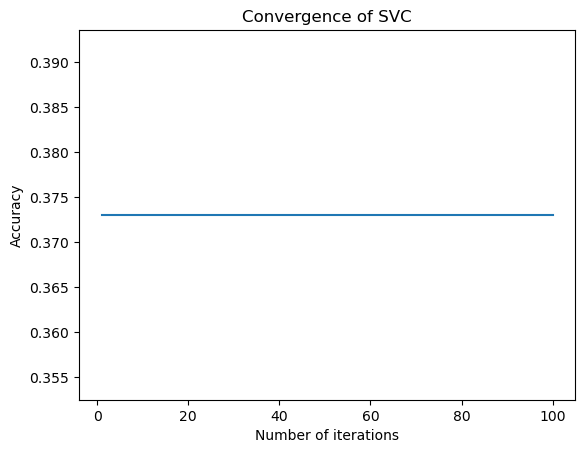

In [74]:
plt.plot(iterations, acc_list)
plt.xlabel('Number of iterations')
plt.ylabel('Accuracy')
plt.title('Convergence of SVC')
plt.show()